<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Assignment5/Session5DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Add

* ReLU after BN
* image normalization
* L2 regularization


In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


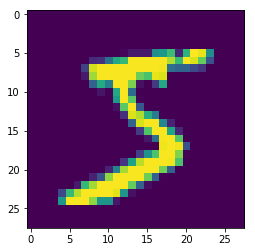

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation, BatchNormalization
from keras.regularizers import l2

l2_reg = 0.0001
dropout=0.15

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1), kernel_regularizer=l2(l2_reg))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(l2_reg))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(l2_reg))) #22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Bottleneck layer
model.add(MaxPooling2D()) #11
model.add(Convolution2D(10, 1, kernel_regularizer=l2(l2_reg))) #11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(l2_reg))) #9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(l2_reg))) #7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# 1x1 Conv
model.add(Convolution2D(10, 1, kernel_regularizer=l2(l2_reg))) #7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Convolution2D(10, 7, kernel_regularizer=l2(l2_reg)))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

checkpoint = ModelCheckpoint('modelBest.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True)

datagen.fit(X_train)

In [13]:
epochs = 40
batch_size = 128
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size, epochs=epochs, validation_data=datagen.flow(X_test, Y_test), validation_steps = len(X_test)/batch_size,
                    callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/468 [==============================] - 19s 41ms/step - loss: 0.2736 - acc: 0.9168 - val_loss: 0.0808 - val_acc: 0.9790

Epoch 00001: val_loss improved from inf to 0.08078, saving model to modelBest.h5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/468 [==============================] - 14s 30ms/step - loss: 0.0950 - acc: 0.9743 - val_loss: 0.0988 - val_acc: 0.9731

Epoch 00002: val_loss did not improve from 0.08078
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/468 [==============================] - 14s 30ms/step - loss: 0.0774 - acc: 0.9801 - val_loss: 0.0538 - val_acc: 0.9862

Epoch 00003: val_loss improved from 0.08078 to 0.05385, saving model to modelBest.h5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/468 [=================

In [0]:
from keras.models import load_model

modelBest = load_model("modelBest.h5")

In [15]:
y_pred = modelBest.predict_generator(datagen.flow(X_test, Y_test), steps=32) #Preprocessing???
print(y_pred)

[[1.0682617e-07 2.5344923e-10 3.4254114e-07 ... 4.8379134e-10
  9.9998105e-01 1.8079802e-05]
 [5.8613625e-09 1.9573325e-12 1.7782058e-08 ... 9.9044833e-15
  8.0984751e-07 4.0179668e-10]
 [1.2303419e-12 1.1826560e-11 4.8214899e-09 ... 2.2043265e-08
  1.6536896e-09 6.2546155e-09]
 ...
 [2.2915746e-08 3.6754252e-11 9.2755154e-10 ... 2.1170357e-13
  7.5688888e-08 3.9719759e-11]
 [1.8089729e-08 3.2472358e-06 9.9989069e-01 ... 1.0463045e-04
  6.1021225e-08 3.2636484e-11]
 [8.4340002e-07 1.8482154e-08 1.3777661e-09 ... 1.1800820e-11
  2.9650330e-08 1.7180010e-08]]


In [23]:
from matplotlib import pyplot as plt
%matplotlib inline


#test_data = X_test * 255
#test_data = test_data.reshape(10000, 28, 28)
misint = []
ip = 0
im = 0
import numpy as np
for p in y_pred:
  print(np.argmax(p), y_test[ip])
  if np.argmax(p) != y_test[ip]:
    misint.append(ip)
    im = im + 1
    if im == 25:
      break
  ip = ip +1
print(misint)
''' 
fig = plt.figure(figsize=(28, 28))
for i in misint:
  plt.subplot(5,5,i+1)
  plt.imshow(test_data[i])

plt.show()
'''

8 7
6 2
3 1
9 0
6 4
1 1
1 4
8 9
5 5
8 9
0 0
7 6
4 9
1 0
3 1
3 5
9 9
6 7
7 3
3 4
3 9
8 6
8 6
4 5
1 4
3 0
7 7
3 4
7 0
2 1
[0, 1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29]


' \nfig = plt.figure(figsize=(28, 28))\nfor i in misint:\n  plt.subplot(5,5,i+1)\n  plt.imshow(test_data[i])\n\nplt.show()\n'

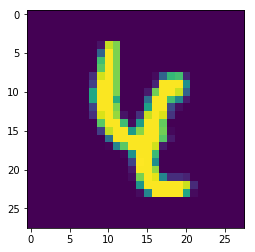

In [47]:
plt.imshow(test_data[160])

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.22119468940198422, 0.9344]


In [0]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[6.1014886e-09 1.2482164e-06 3.3965912e-06 2.5490947e-06 4.3349521e-10
  1.0206591e-09 8.9582450e-15 9.9998939e-01 5.3620158e-10 3.4716813e-06]
 [1.4545795e-03 8.5461080e-02 9.1073245e-01 1.3686250e-07 4.4539956e-06
  1.9814611e-06 2.3398891e-03 4.5905840e-06 8.0931551e-07 5.1222507e-08]
 [7.9670759e-10 9.9999762e-01 5.4900318e-07 5.4304733e-10 1.3489681e-07
  5.9742675e-08 6.6852877e-08 1.5492741e-06 1.6665669e-09 7.5676212e-09]
 [9.9992633e-01 4.8516966e-07 5.9754461e-07 2.0011390e-08 3.3772942e-06
  1.5220284e-07 4.4401044e-05 5.8530225e-07 2.3344226e-06 2.1722006e-05]
 [2.1790935e-07 4.6282068e-05 2.4459166e-07 4.8966029e-08 9.9920207e-01
  2.8347310e-08 1.2782453e-07 1.1554765e-06 3.6443979e-07 7.4948865e-04]
 [8.2188001e-10 9.9999547e-01 3.5203544e-07 3.0801403e-10 3.7878698e-07
  2.1107203e-08 3.1819507e-08 3.7898371e-06 2.9113179e-09 2.1742812e-08]
 [2.3252564e-09 2.9600800e-03 6.1233463e-06 2.4740424e-07 9.9590850e-01
  3.0643781e-07 6.0736456e-09 7.5812958e-04 9.4308431e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

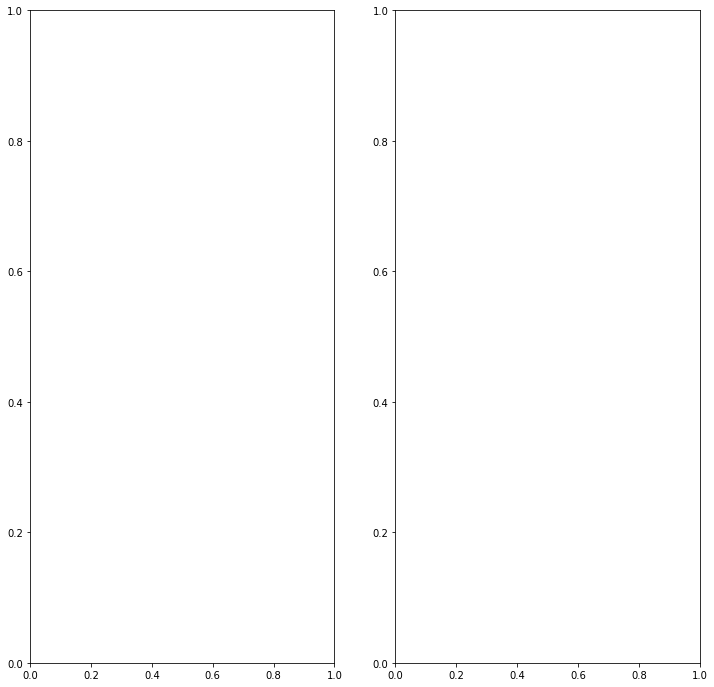

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()